In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths
leiden = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_leiden.parquet')
hdbscan = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_hdbscan.parquet')

out = os.path.join(os.getcwd(), 'output/3d_umap_clusters')
if not os.path.exists(out):
    os.makedirs(out)

Leiden cluster 0


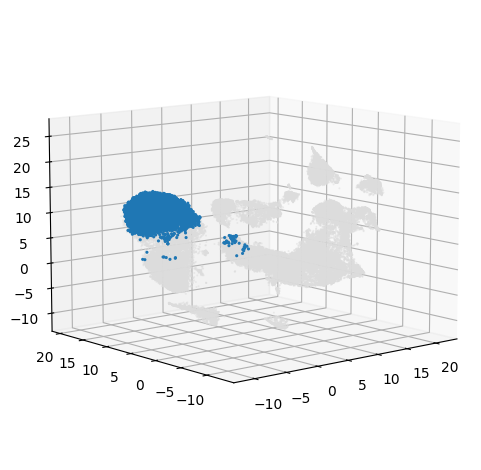

Leiden cluster 1


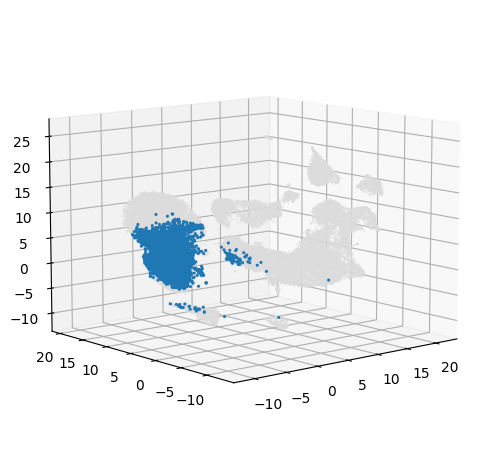

Leiden cluster 2


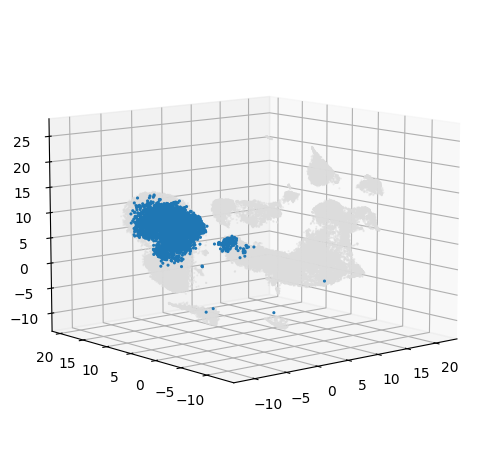

Leiden cluster 3


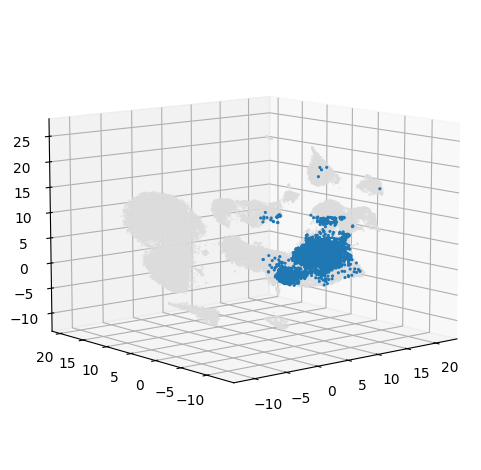

Leiden cluster 4


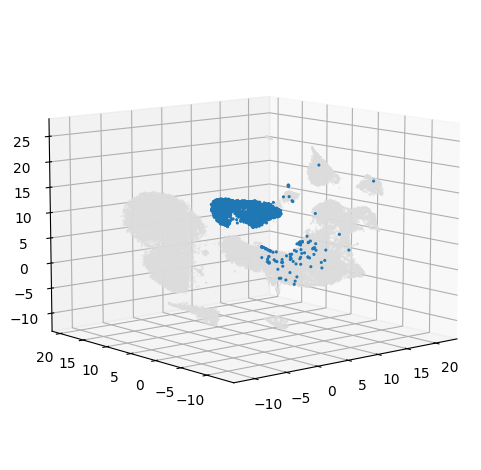

Leiden cluster 5


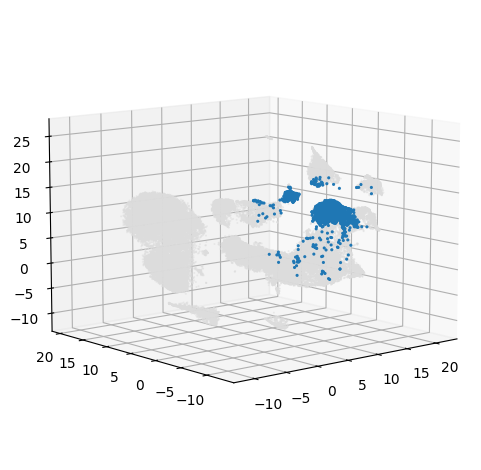

Leiden cluster 6


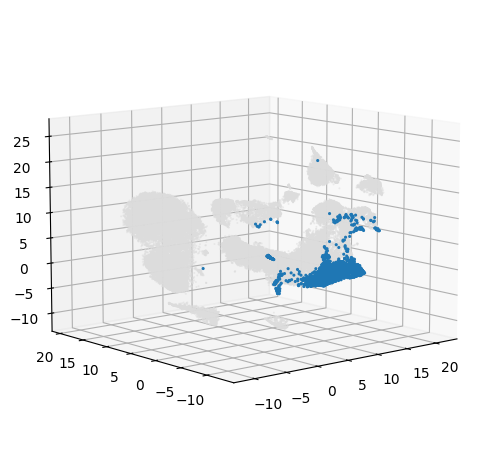

Leiden cluster 7


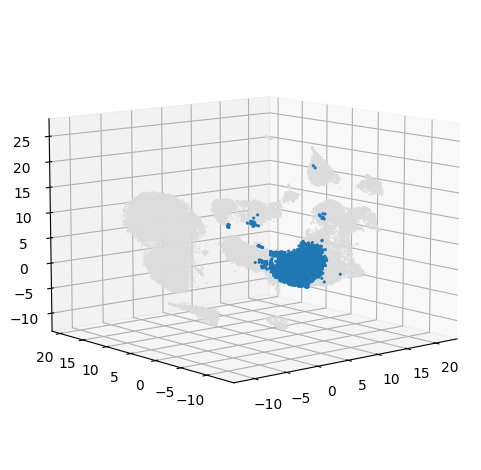

Leiden cluster 8


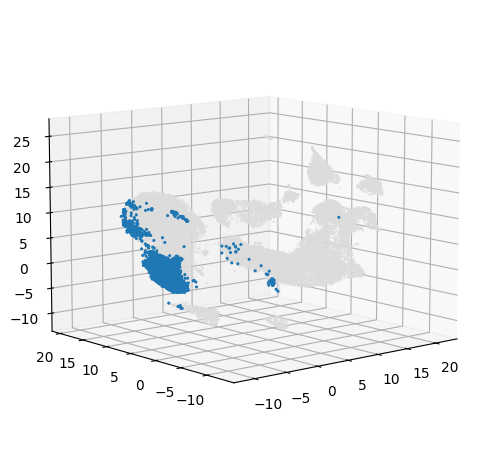

Leiden cluster 9


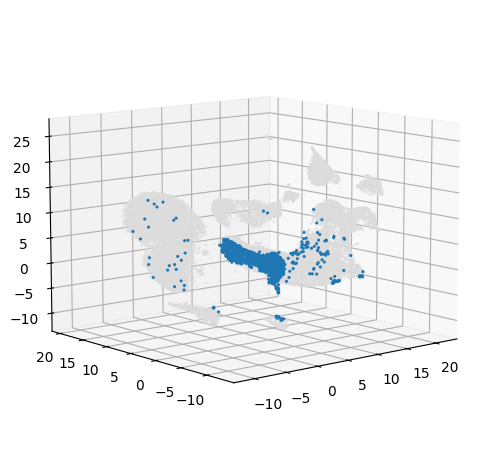

Leiden cluster 10


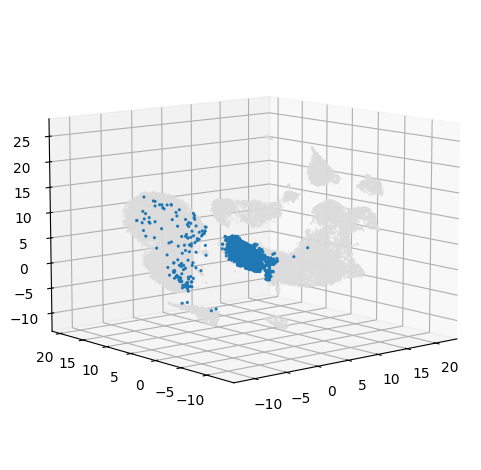

Leiden cluster 11


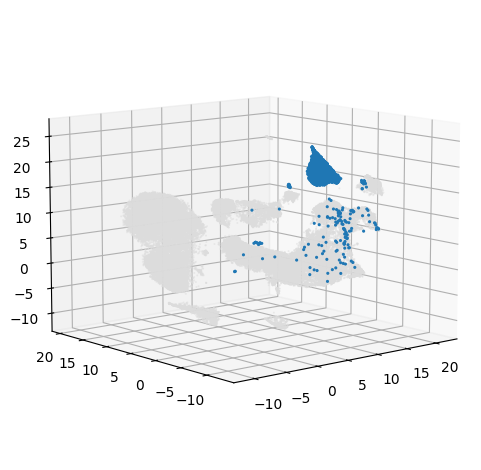

Leiden cluster 12


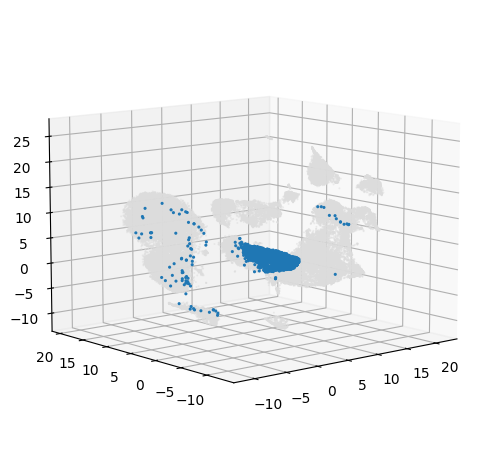

Leiden cluster 13


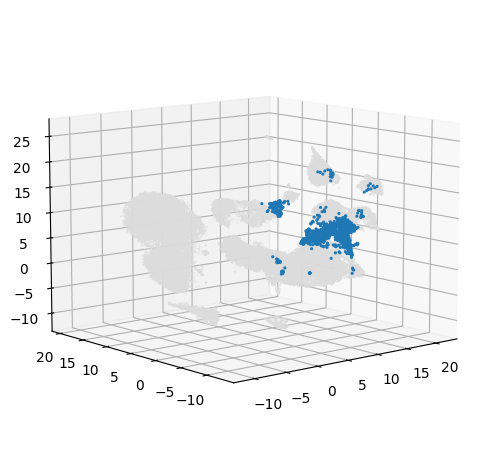

Leiden cluster 14


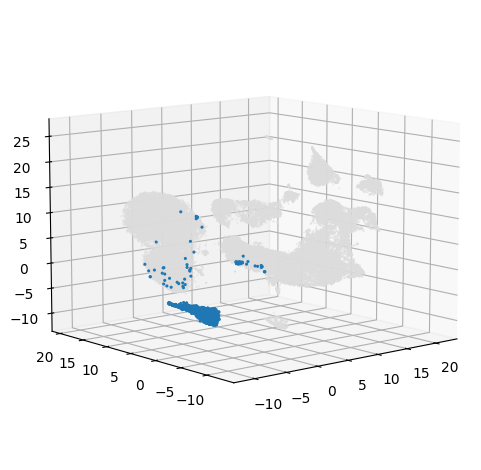

Leiden cluster 15


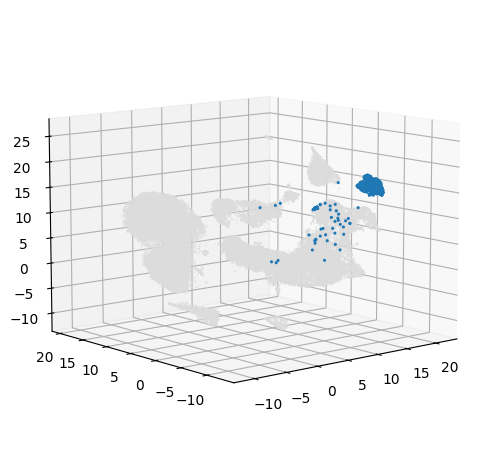

Leiden cluster 16


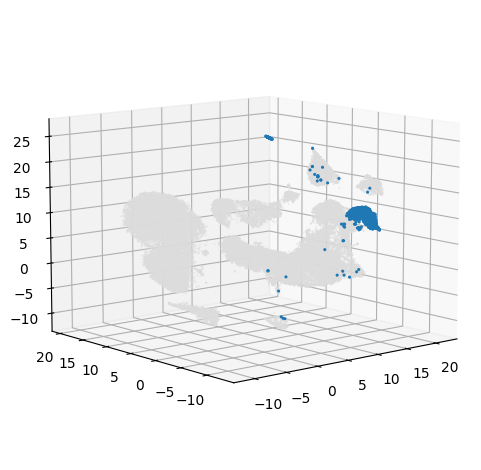

Leiden cluster 17


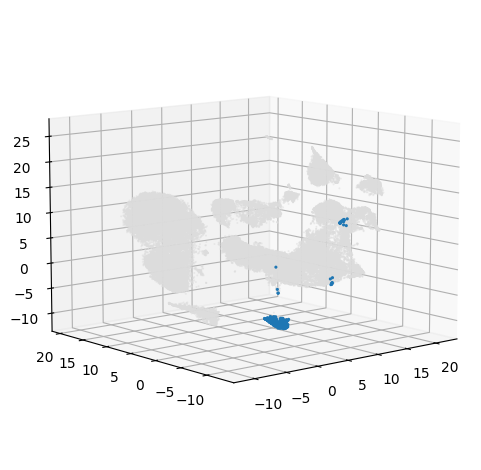

Leiden cluster 18


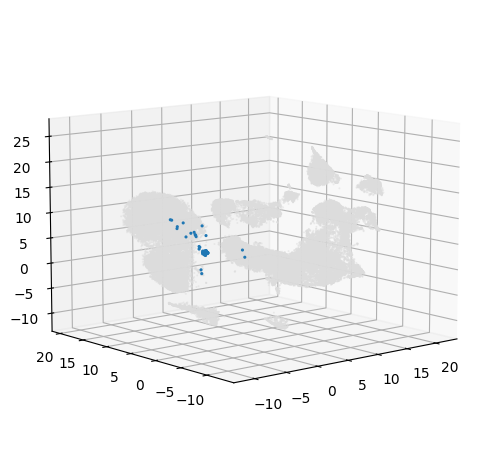

HDBSCAN cluster 0


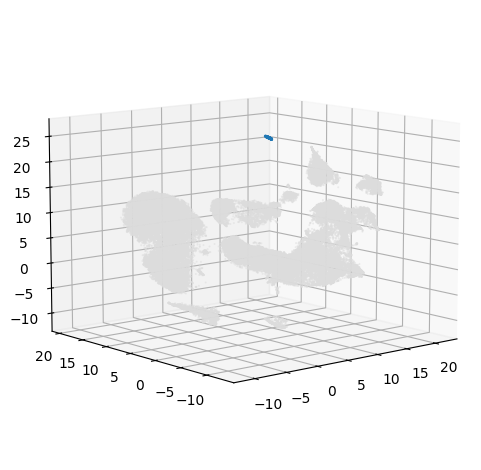

HDBSCAN cluster 1


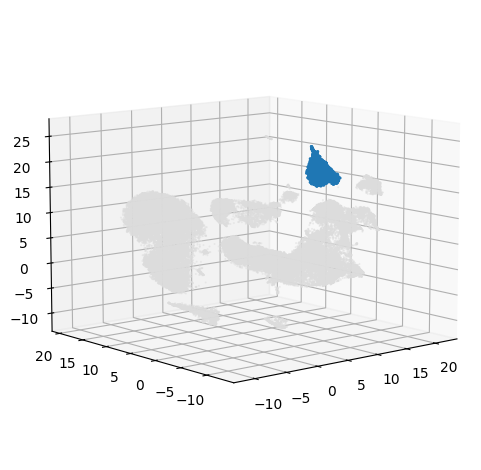

HDBSCAN cluster 2


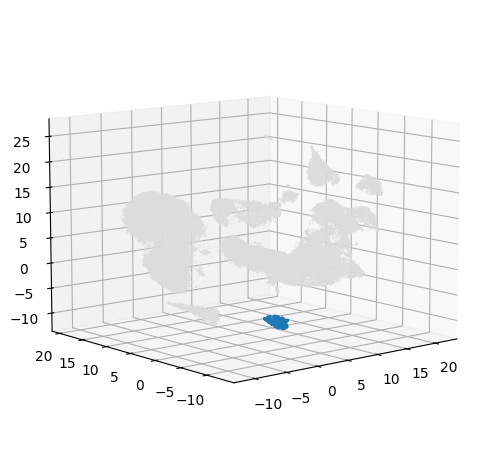

HDBSCAN cluster 3


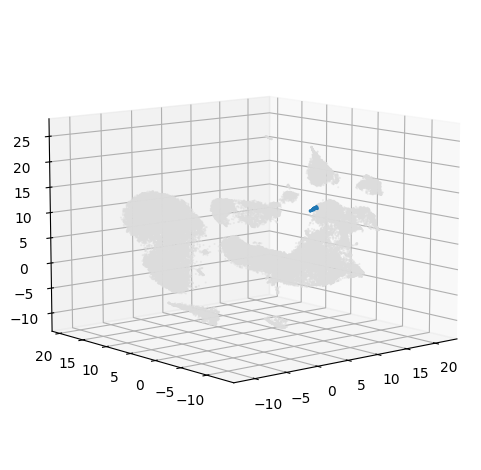

HDBSCAN cluster 4


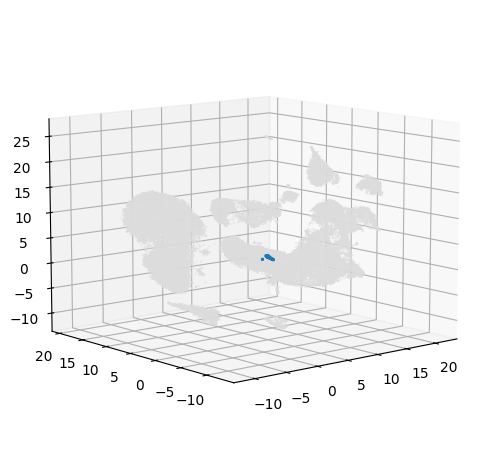

HDBSCAN cluster 5


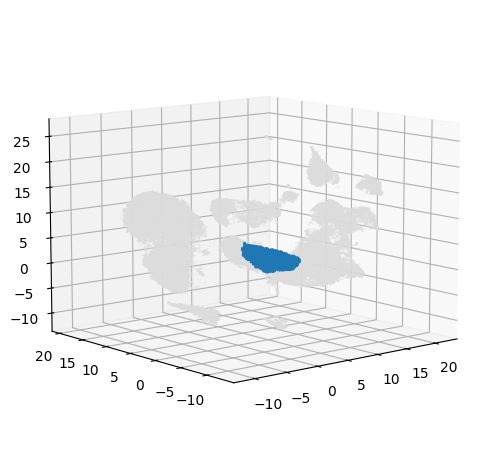

HDBSCAN cluster 6


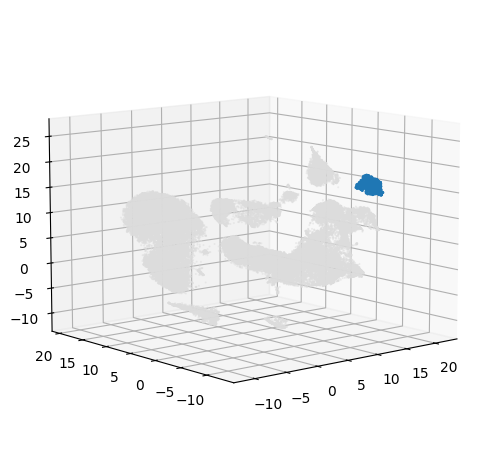

HDBSCAN cluster 7


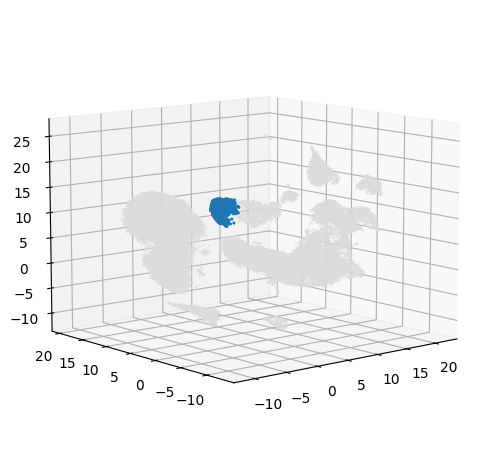

HDBSCAN cluster 8


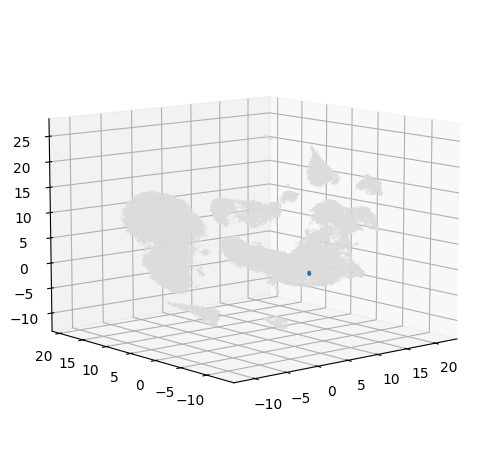

HDBSCAN cluster 9


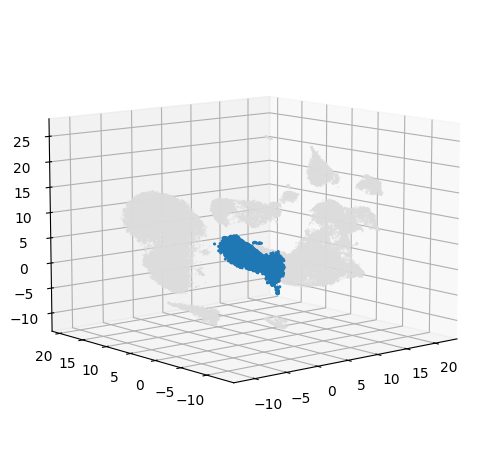

HDBSCAN cluster 10


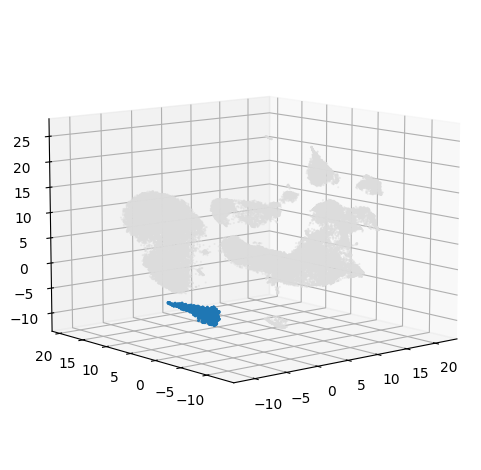

HDBSCAN cluster 11


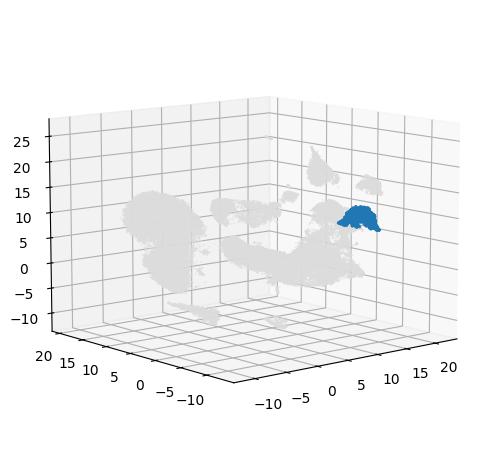

HDBSCAN cluster 12


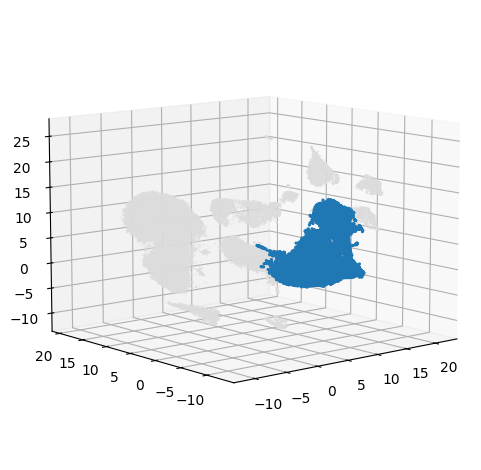

HDBSCAN cluster 13


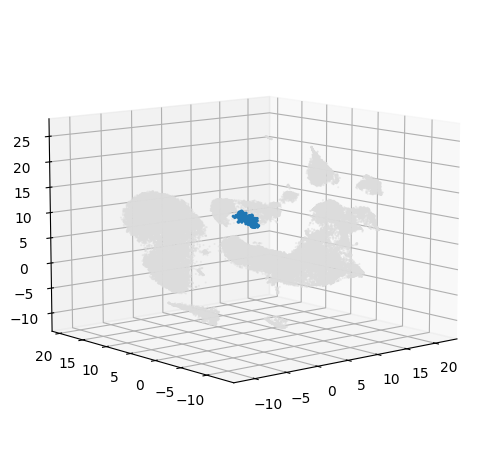

HDBSCAN cluster 14


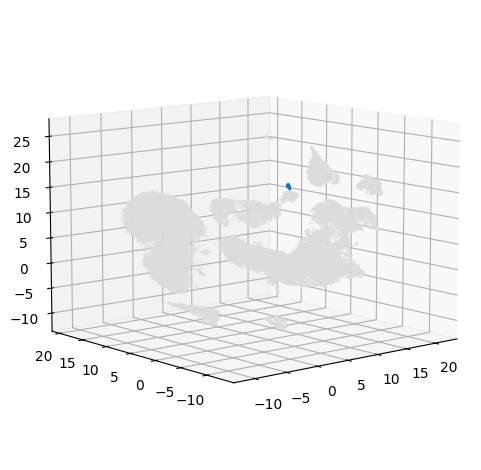

HDBSCAN cluster 15


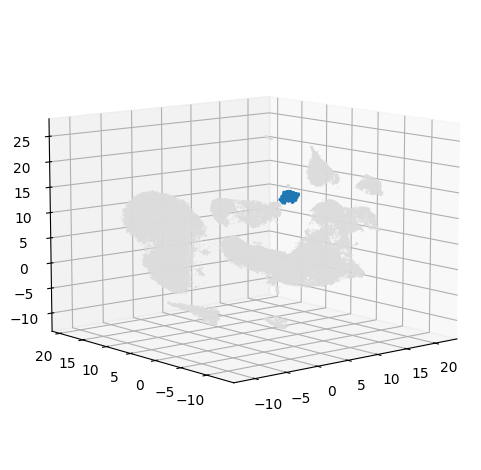

HDBSCAN cluster 16


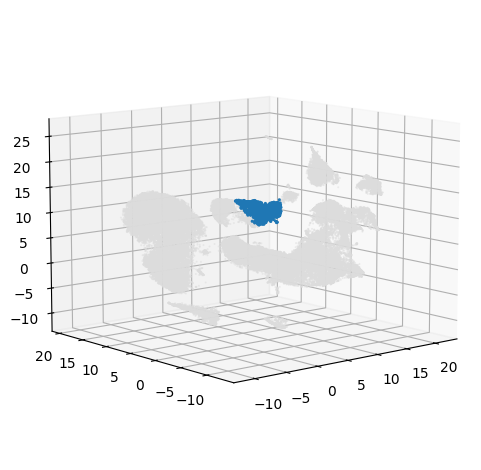

HDBSCAN cluster 17


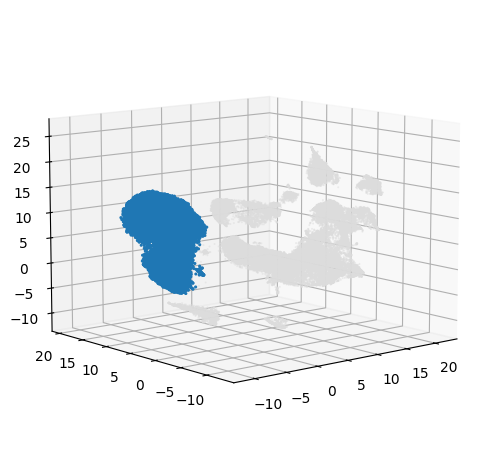

HDBSCAN cluster 18


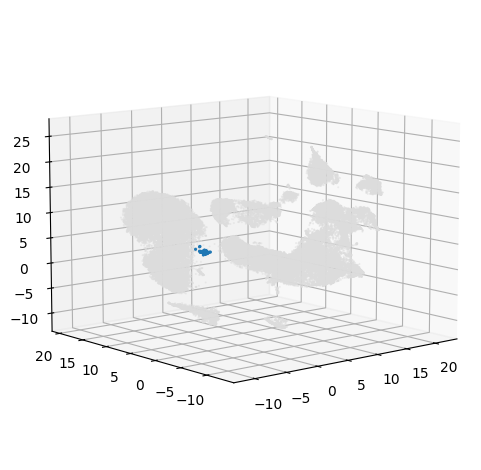

In [3]:
# Plot
for name, col, clustering in zip(
    ['Leiden', 'HDBSCAN'], ['cluster_2d', 'cluster'], [leiden, hdbscan]): 
    
    data = pd.read_parquet(clustering).sample(frac=0.05)

    for i in sorted(data[col].unique()):
        if i != -1:
            print(f'{name} cluster {i}')
            
            fig = plt.figure()
            ax = plt.axes(projection='3d', computed_zorder=False)
            ax.view_init(azim=-130, elev=10)  # all clusters view
            
            ax.scatter(
                data['emb1'], data['emb2'], data['emb3'],
                c='gainsboro', linewidth=0.0, s=2, alpha=0.5
            )
            ax.scatter(
                data['emb1'][data[col] == i],
                data['emb2'][data[col] == i],
                data['emb3'][data[col] == i],
                c='tab:blue', linewidth=0.0, s=5, alpha=1,
            )
            
            ax.axis('auto')
            ax.tick_params(labelsize=10)
            ax.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(out, f'{name}_cluster_{i}.png'), dpi=800)
            plt.show()